## Exercise 2 : Clustering Method
In this exercise we will explore how each clustering algorithm discussed in the class works.

### Import Library

Import the necessary libraries

In [243]:
!pip install kneed
from kneed import KneeLocator
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import fcluster, linkage, dendrogram
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.impute import SimpleImputer
import scipy.cluster.hierarchy as sch

### Load Dataset
The dataset that we will use is a **Property Dataset**. In this dataset there will be 11 features including: <br>
- Area Category,
- Luas Tanah (m2),
- Luas Bangunan (m2),
- Jumlah Kamar,
- Jumlah Kamar Mandi,
- Tingkat/Lantai,
- Harga Penawaran (dari Owner),
- Terjual/Belum,
- Arah Hadap Rumah,
- Posisi Rumah,
- Lebar Jalan Depan Rumah (ROW). <br>

You can get the dataset from **Elearn**

Load dataset

In [244]:
data = pd.read_csv('https://raw.githubusercontent.com/VickySav/Datasets/refs/heads/main/property_dataset.csv')
data.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,NaN,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [245]:
data.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai
count,307.000000,307.000000,307.000000,306.000000,306.000000
mean,226.908795,266.579805,4.276873,3.339869,1.856209
std,202.149571,213.501196,1.646412,1.632311,0.512702
min,14.000000,14.000000,1.000000,1.000000,1.000000
25%,96.000000,120.000000,3.000000,2.000000,2.000000
50%,162.000000,200.000000,4.000000,3.000000,2.000000
75%,286.000000,332.500000,5.000000,4.000000,2.000000
max,1561.000000,1200.000000,13.000000,13.000000,4.000000


In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area Category                  307 non-null    object 
 1   Nama Daerah                    307 non-null    object 
 2   Luas Tanah (m2)                307 non-null    float64
 3   Luas Bangunan (m2)             307 non-null    float64
 4   Jumlah Kamar                   307 non-null    float64
 5   Jumlah Kamar Mandi             306 non-null    float64
 6   Tingkat/Lantai                 306 non-null    float64
 7   Harga Penawaran (dari Owner)   307 non-null    object 
 8   Terjual/Belum                  307 non-null    object 
 9   Arah Hadap Rumah               225 non-null    object 
 10  Posisi Rumah                   192 non-null    object 
 11  Lebar Jalan Depan Rumah (ROW)  266 non-null    object 
dtypes: float64(5), object(7)
memory usage: 29.0+ KB


Data Preparation

1. Check if there are any missing values in the data.
2. Check the percentage of null values.
3. Perform label encoding.
4. Apply feature scaling to the data.

1.

In [247]:
data.isnull().sum()

,0
Area Category,1
Nama Daerah,1
Luas Tanah (m2),1
Luas Bangunan (m2),1
Jumlah Kamar,1
Jumlah Kamar Mandi,2
Tingkat/Lantai,2
Harga Penawaran (dari Owner),1
Terjual/Belum,1
Arah Hadap Rumah,83


2.

In [248]:
null_percentage = (data.isnull().sum() / len(data)) * 100

null_percentage

,0
Area Category,0.324675
Nama Daerah,0.324675
Luas Tanah (m2),0.324675
Luas Bangunan (m2),0.324675
Jumlah Kamar,0.324675
Jumlah Kamar Mandi,0.649351
Tingkat/Lantai,0.649351
Harga Penawaran (dari Owner),0.324675
Terjual/Belum,0.324675
Arah Hadap Rumah,26.948052


Since there are too many nulls but not up to 50%, it’s better to fill them in using SimpleImputer with the strategy set to 'most_frequent'

In [249]:
simple_imputer = SimpleImputer(strategy='most_frequent')
data = pd.DataFrame(simple_imputer.fit_transform(data), columns=data.columns)
data.head()


,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


In [250]:
data.isnull().sum()

,0
Area Category,0
Nama Daerah,0
Luas Tanah (m2),0
Luas Bangunan (m2),0
Jumlah Kamar,0
Jumlah Kamar Mandi,0
Tingkat/Lantai,0
Harga Penawaran (dari Owner),0
Terjual/Belum,0
Arah Hadap Rumah,0


Drop the column 'Nama Daerah' because all the values are different.

In [251]:
data = data.drop(columns=['Nama Daerah'])
data.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,240.0,300.0,4.0,3.0,2.0,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,30.0,60.0,2.0,1.0,2.0,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,170.0,170.0,5.0,4.0,2.0,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,187.0,250.0,5.0,5.0,2.0,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,350.0,600.0,5.0,5.0,2.0,5000000000,Belum,Barat,Standard,1-2 Mobil


3.

In [252]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for col in ['Arah Hadap Rumah', 'Posisi Rumah']:
    data[col] = label_encoder.fit_transform(data[col])

data['Terjual/Belum'] = data['Terjual/Belum'].map({'Terjual': 0, 'Belum': 1})
data['Area Category'] = data['Area Category'].map({'Sangat Premium': 1, 'Premium': 2, 'Standard': 3, 'Below Standard': 4})
data['Lebar Jalan Depan Rumah (ROW)'] = data['Lebar Jalan Depan Rumah (ROW)'].map({'< 1 Mobil': 1, '1-2 Mobil': 2, '> 2 Mobil': 3})
data.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,3,240.0,300.0,4.0,3.0,2.0,3500000000,1,3,2,2
1,4,30.0,60.0,2.0,1.0,2.0,287799000,1,3,2,1
2,3,170.0,170.0,5.0,4.0,2.0,2699999999,1,1,0,2
3,1,187.0,250.0,5.0,5.0,2.0,3100000000,1,3,2,2
4,2,350.0,600.0,5.0,5.0,2.0,5000000000,1,0,2,2


To replace incorrect or invalid data in the column "Harga Penawaran (dari Owner)", do the following:

Replace empty values (" ") with "10500000000".

Replace values with commas like "10.500.000.000,00" with "10500000000".

In [253]:
data['Harga Penawaran (dari Owner)'] = data['Harga Penawaran (dari Owner)'].replace(' ', '10500000000')
data['Harga Penawaran (dari Owner)'] = data['Harga Penawaran (dari Owner)'].str.replace(',', '', regex=False)

check the data type

In [254]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    int64 
 1   Luas Tanah (m2)                308 non-null    object
 2   Luas Bangunan (m2)             308 non-null    object
 3   Jumlah Kamar                   308 non-null    object
 4   Jumlah Kamar Mandi             308 non-null    object
 5   Tingkat/Lantai                 308 non-null    object
 6   Harga Penawaran (dari Owner)   308 non-null    object
 7   Terjual/Belum                  308 non-null    int64 
 8   Arah Hadap Rumah               308 non-null    int64 
 9   Posisi Rumah                   308 non-null    int64 
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64 
dtypes: int64(5), object(6)
memory usage: 26.6+ KB


Change the data types from:

- float to int
- object to int

In [255]:
data = data.astype({
    'Area Category': 'int64',
    'Luas Tanah (m2)': 'int64',
    'Luas Bangunan (m2)': 'int64',
    'Jumlah Kamar': 'int64',
    'Jumlah Kamar Mandi': 'int64',
    'Tingkat/Lantai ': 'int64',
    'Harga Penawaran (dari Owner)': 'int64',
    'Terjual/Belum': 'int64',
    'Arah Hadap Rumah': 'int64',
    'Posisi Rumah': 'int64',
    'Lebar Jalan Depan Rumah (ROW)': 'int64'
})

In [256]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   Area Category                  308 non-null    int64
 1   Luas Tanah (m2)                308 non-null    int64
 2   Luas Bangunan (m2)             308 non-null    int64
 3   Jumlah Kamar                   308 non-null    int64
 4   Jumlah Kamar Mandi             308 non-null    int64
 5   Tingkat/Lantai                 308 non-null    int64
 6   Harga Penawaran (dari Owner)   308 non-null    int64
 7   Terjual/Belum                  308 non-null    int64
 8   Arah Hadap Rumah               308 non-null    int64
 9   Posisi Rumah                   308 non-null    int64
 10  Lebar Jalan Depan Rumah (ROW)  308 non-null    int64
dtypes: int64(11)
memory usage: 26.6 KB


4.

In [257]:
# scaling data
scaler = StandardScaler()
data = pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
data.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,0.494434,0.064760,0.156529,-0.168161,-0.207847,0.313723,-0.182491,0.0,0.839497,-0.188069,-0.598758
1,1.742677,-0.977457,-0.971209,-1.386831,-1.438941,0.313723,-0.569600,0.0,0.839497,-0.188069,-2.406773
2,0.494434,-0.282646,-0.454330,0.441174,0.407700,0.313723,-0.278901,0.0,-1.141845,-5.453988,-0.598758
3,-2.002052,-0.198276,-0.078417,0.441174,1.023247,0.313723,-0.230696,0.0,0.839497,-0.188069,-0.598758
4,-0.753809,0.610683,1.566201,0.441174,1.023247,0.313723,-0.001723,0.0,-2.132516,-0.188069,-0.598758


## K-Means Clustering

Using the elbow method, determine the number of clusters to be formed.

Use the elbow range range(1, 11)

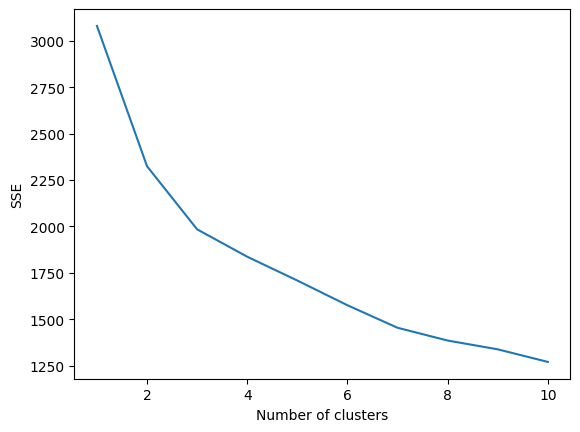

In [258]:
# set the parameter for evaluating K
from sklearn.cluster import KMeans
sse = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='random', max_iter=300, n_init='auto', random_state=42)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# manually visualize the elbow method using plotlib
plt.plot(range(1, 11), sse)
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [259]:
# using kneelocator to find the elbow/knee
from kneed import KneeLocator
kneedle = KneeLocator(range(1, 11), sse, curve='convex', direction='decreasing')
print('The best k for you model is', kneedle.elbow)

The best k for you model is 3


Train the K-Means model on the dataset with the number of clusters you have determined.

In [260]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='random', max_iter=300, n_init= 300, random_state=42)
y_pred = kmeans.fit_predict(data)

In [261]:
# Inverse transform the scaled data to get the original values
data = pd.DataFrame(scaler.inverse_transform(data), columns=data.columns)
data['KMeans'] = y_pred
data.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0


Display the cluster summary in the form of a dataframe:

1. For categorical columns: mode (use pd.Series.mode to find the mode; you do not need to use " " for this attribute).
2. For continuous columns: mean.
3. Cluster results: count.

In [262]:
cluster_summary  = {
   'Area Category': [pd.Series.mode, 'min', 'max'],
    'Luas Tanah (m2)': ['mean', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'min', 'max'],
    'Jumlah Kamar': [pd.Series.mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [pd.Series.mode, 'min', 'max'],
    'Tingkat/Lantai ': [pd.Series.mode, 'min', 'max'],
    'Harga Penawaran (dari Owner)': ['mean', 'min', 'max'],
    'Terjual/Belum': pd.Series.mode,
    'Arah Hadap Rumah': pd.Series.mode,
    'Posisi Rumah': pd.Series.mode,
    'Lebar Jalan Depan Rumah (ROW)': pd.Series.mode
}
cluster_summary = data.groupby('KMeans').agg(cluster_summary)

cluster_summary_transposed = cluster_summary.transpose()

new_columns = [f"Cluster {col}" for col in cluster_summary_transposed.columns]
cluster_summary_transposed.columns = pd.Index(new_columns, name="KMeans")

cluster_summary_transposed

KMeans                                      Cluster 0           Cluster 1  \
Area Category                 mode                2.0                 1.0   
                              min                 1.0                 1.0   
                              max                 4.0                 4.0   
Luas Tanah (m2)               mean         187.378205              570.68   
                              min                50.0               240.0   
                              max               525.0              1561.0   
Luas Bangunan (m2)            mean         243.814103              642.22   
                              min                75.0               350.0   
                              max               600.0              1200.0   
Jumlah Kamar                  mode                4.0                 5.0   
                              min                 3.0                 3.0   
                              max                 9.0                13.0   
Jumlah Kamar Mandi            mode                4.0                 5.0   
                              min                 1.0                 2.0   
                              max                 7.0                13.0   
Tingkat/Lantai                mode                2.0                 2.0   
                              min                 1.0                 1.0   
                              max                 3.0                 4.0   
Harga Penawaran (dari Owner)  mean  3544236467.205128  16756299779.959999   
                              min         645000000.0        2750000000.0   
                              max       19500000000.0       99000000000.0   
Terjual/Belum                 mode                1.0                 1.0   
Arah Hadap Rumah              mode                3.0                 3.0   
Posisi Rumah                  mode                2.0                 2.0   
Lebar Jalan Depan Rumah (ROW) mode                2.0                 3.0   

KMeans                                      Cluster 2  
Area Category                 mode                3.0  
                              min                 2.0  
                              max                 4.0  
Luas Tanah (m2)               mean         118.980392  
                              min                14.0  
                              max               495.0  
Luas Bangunan (m2)            mean         117.588235  
                              min                14.0  
                              max               495.0  
Jumlah Kamar                  mode                2.0  
                              min                 1.0  
                              max                 5.0  
Jumlah Kamar Mandi            mode                2.0  
                              min                 1.0  
                              max                 4.0  
Tingkat/Lantai                mode         [1.0, 2.0]  
                              min                 1.0  
                              max                 2.0  
Harga Penawaran (dari Owner)  mean  1506754456.117647  
                              min         160000000.0  
                              max       10500000000.0  
Terjual/Belum                 mode                1.0  
Arah Hadap Rumah              mode                3.0  
Posisi Rumah                  mode                2.0  
Lebar Jalan Depan Rumah (ROW) mode                2.0

In [263]:
# count data from each cluster
data['KMeans'].value_counts()

,count
KMeans,
0,156
2,102
1,50


In [264]:
# write down your interpretation from the cluster that you have been made

Cluster 0 menggambarkan properti dengan ukuran tanah dan bangunan yang relatif moderat, dengan rata-rata luas tanah sebesar 187,38 m² dan luas bangunan 243,81 m². Properti dalam klaster ini biasanya memiliki 4 kamar sebagai jumlah paling umum, dengan rentang 3–9 kamar, menjadikannya ideal untuk keluarga besar. Harga penawaran rata-rata di klaster ini adalah sekitar Rp 3,54 miliar, dengan variasi yang cukup besar, mulai dari Rp 645 juta hingga Rp 19,5 miliar. Properti ini umumnya berada di kategori area 2 dan memiliki akses jalan dengan kategori lebar jalan 2.

Cluster 1 menampilkan properti dengan ukuran yang sangat besar, baik dari sisi tanah maupun bangunan. Rata-rata luas tanah di klaster ini adalah 570,68 m², dan luas bangunannya mencapai 642,22 m². Properti ini sering kali memiliki 5 kamar, dengan rentang 3–13 kamar, cocok untuk kebutuhan mewah atau rumah besar. Harga penawaran di klaster ini rata-rata jauh lebih tinggi, sekitar Rp 16,75 miliar, dengan kisaran antara Rp 2,75 miliar hingga Rp 99 miliar. Properti dalam klaster ini berada di area kategori 1, dengan lebar jalan di depan rumah yang lebih besar, yaitu kategori lebar jalan 3.

Cluster 2 mencakup properti dengan ukuran tanah dan bangunan yang lebih kecil dibandingkan klaster lainnya, dengan rata-rata luas tanah 118,98 m² dan luas bangunan 117,59 m². Properti ini biasanya memiliki 2 kamar, dengan rentang 1–5 kamar, menjadikannya cocok untuk keluarga kecil atau individu. Harga penawaran rata-rata adalah sekitar Rp 1,5 miliar, dengan kisaran Rp 160 juta hingga Rp 10,5 miliar. Properti dalam klaster ini berada di area kategori 3, dengan akses jalan yang sama seperti klaster 0, yaitu kategori lebar jalan 2.

Cluster 0 mencerminkan properti moderat yang sesuai untuk keluarga besar dengan harga menengah.
Cluster 1 mewakili properti mewah dengan ukuran besar dan harga tinggi.
Cluster 2 menggambarkan properti kecil yang lebih terjangkau, ideal untuk keluarga kecil atau individu.

## Hierarchical Clustering
Hierarchical clustering uses the agglomerative method.

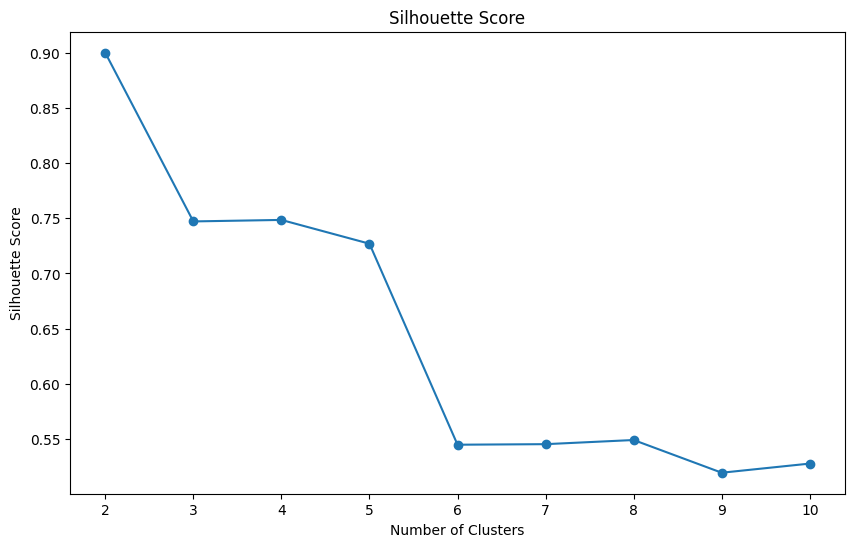

In [265]:
# The image below is not the final result, if yours looks different, that’s okay.3
silhouette_scores = []
for k in range(2, 11):
      cluster_labels = fcluster(linkage(data, method="ward"), k, criterion='maxclust')
      silhouette_avg = silhouette_score(data, cluster_labels)
      silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

Perform hierarchical clustering with the Euclidean distance metric and set the number of clusters based on silhouette score.

In [266]:
# agglomerative clustering
agglomerative_clustering = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
y_pred = agglomerative_clustering.fit_predict(data)

In [267]:
# Add the cluster labels to the original data that you have been added with kmeans so you have a full dataframe include kmeans and agglo clustering
data['Agglo'] = y_pred

# show the df
data.head()

,Area Category,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),KMeans,Agglo
0,3.0,240.0,300.0,4.0,3.0,2.0,3.500000e+09,1.0,3.0,2.0,2.0,0,2
1,4.0,30.0,60.0,2.0,1.0,2.0,2.877990e+08,1.0,3.0,2.0,1.0,2,2
2,3.0,170.0,170.0,5.0,4.0,2.0,2.700000e+09,1.0,1.0,0.0,2.0,0,2
3,1.0,187.0,250.0,5.0,5.0,2.0,3.100000e+09,1.0,3.0,2.0,2.0,0,2
4,2.0,350.0,600.0,5.0,5.0,2.0,5.000000e+09,1.0,0.0,2.0,2.0,0,2


Display the cluster summary in the form of a dataframe.

In [268]:
agglo_summary = data.groupby(y_pred).agg({
    'Area Category': [pd.Series.mode, 'min', 'max'],
    'Luas Tanah (m2)': ['mean', 'min', 'max'],
    'Luas Bangunan (m2)': ['mean', 'min', 'max'],
    'Jumlah Kamar': [pd.Series.mode, 'min', 'max'],
    'Jumlah Kamar Mandi': [pd.Series.mode, 'min', 'max'],
    'Tingkat/Lantai ': [pd.Series.mode, 'min', 'max']
})
agglo_summary = agglo_summary.rename_axis("Agglo")
agglo_summary

Area Category           Luas Tanah (m2)                 \
               mode  min  max            mean    min     max   
Agglo                                                          
0               1.0  1.0  3.0      836.250000  600.0  1000.0   
1               2.0  1.0  4.0      524.058824   84.0  1561.0   
2               3.0  1.0  4.0      157.426877   14.0   495.0   

      Luas Bangunan (m2)                Jumlah Kamar             \
                    mean    min     max         mode  min   max   
Agglo                                                             
0             975.000000  600.0  1200.0          7.0  5.0   7.0   
1             549.450980   70.0  1100.0          5.0  2.0   8.0   
2             198.490119   14.0   750.0          4.0  1.0  13.0   

      Jumlah Kamar Mandi            Tingkat/Lantai             
                    mode  min   max            mode  min  max  
Agglo                                                          
0                    5.0  5.0   8.0             2.0  1.0  3.0  
1                    5.0  1.0   8.0             2.0  1.0  3.0  
2                    4.0  1.0  13.0             2.0  1.0  4.0

In [269]:
# Custom mode function to ensure single value
def single_mode(series):
    return series.mode()[0] if not series.mode().empty else np.nan

# Aggregation with custom mode function
agglo_summary2 = data.groupby(y_pred).agg({
    'Harga Penawaran (dari Owner)': ['mean', 'min', 'max'],
    'Terjual/Belum': single_mode,
    'Arah Hadap Rumah': single_mode,
    'Posisi Rumah': single_mode,
    'Lebar Jalan Depan Rumah (ROW)': single_mode
})

# Rename the index for clarity
agglo_summary2 = agglo_summary2.rename_axis('agglo')
agglo_summary2

Harga Penawaran (dari Owner)                             Terjual/Belum  \
                              mean           min           max   single_mode   
agglo                                                                          
0                     5.800000e+10  3.500000e+10  9.900000e+10           1.0   
1                     1.355208e+10  7.000000e+09  2.850000e+10           1.0   
2                     2.455529e+09  1.600000e+08  6.500000e+09           1.0   

      Arah Hadap Rumah Posisi Rumah Lebar Jalan Depan Rumah (ROW)  
           single_mode  single_mode                   single_mode  
agglo                                                              
0                  3.0          2.0                           2.0  
1                  3.0          2.0                           3.0  
2                  3.0          2.0                           2.0

In [270]:
data['Agglo'].value_counts().sort_index()

,count
Agglo,
0,4
1,51
2,253


In [271]:
# write down your interpretation from the cluster that you have been made

Cluster 0 merepresentasikan properti dengan harga penawaran rata-rata yang sangat tinggi, yaitu Rp 58 miliar, dengan rentang antara Rp 35 miliar hingga Rp 99 miliar. Properti dalam klaster ini biasanya terjual (1), dengan arah hadap rumah yang dominan adalah kategori 3. Posisi rumah dalam klaster ini umumnya berada di kategori 2, dan lebar jalan di depan rumah juga berada di kategori 2, menunjukkan jalan yang relatif sedang.

Cluster 1 menggambarkan properti dengan harga penawaran yang lebih rendah dibandingkan klaster pertama, dengan rata-rata Rp 13,55 miliar dan kisaran antara Rp 7 miliar hingga Rp 28,5 miliar. Sama seperti klaster pertama, properti ini mayoritas terjual (1), memiliki arah hadap rumah kategori 3, dan posisi rumah di kategori 2. Namun, properti ini memiliki lebar jalan yang lebih luas dibandingkan klaster lainnya, yaitu kategori 3, menjadikannya lebih eksklusif.

Cluster 2 mencakup properti dengan harga yang jauh lebih terjangkau, dengan rata-rata Rp 2,45 miliar dan rentang mulai dari Rp 160 juta hingga Rp 6,5 miliar. Properti dalam klaster ini juga mayoritas terjual (1), memiliki arah hadap rumah kategori 3, dan posisi rumah di kategori 2. Lebar jalan di depan rumah berada di kategori 2, mirip dengan Cluster 0.

Cluster 0 mencerminkan properti dengan harga penawaran yang sangat tinggi, cocok untuk segmen premium.
Cluster 1 mencerminkan properti mewah dengan harga lebih rendah dari Cluster 0 tetapi tetap memiliki fasilitas jalan lebih luas (kategori 3).
Cluster 2 adalah klaster untuk properti dengan harga terjangkau, lebih cocok untuk segmen menengah atau pembeli dengan anggaran terbatas.

**Hierarchical Visualization**

Single Linkage

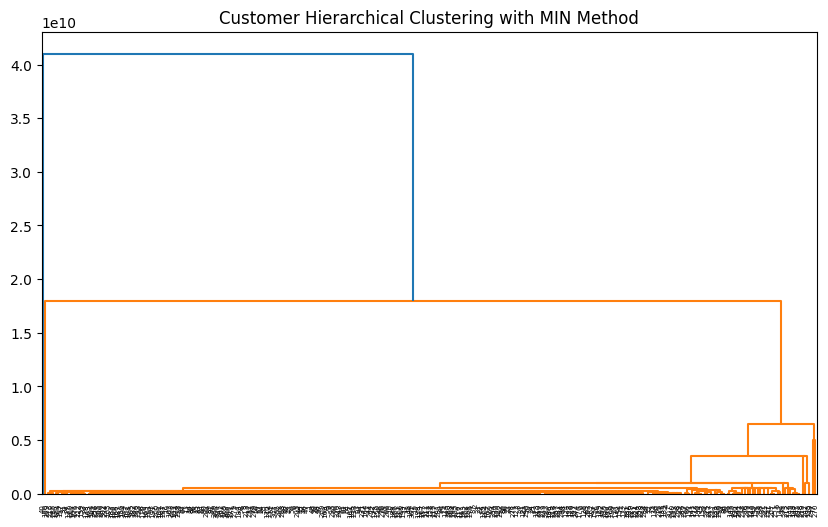

In [278]:
single_linkage = linkage(data, method='single')

plt.figure(figsize=(10, 6))
dendrogram(single_linkage)
plt.title('Customer Hierarchical Clustering with MIN Method')
plt.show()

complete linkage

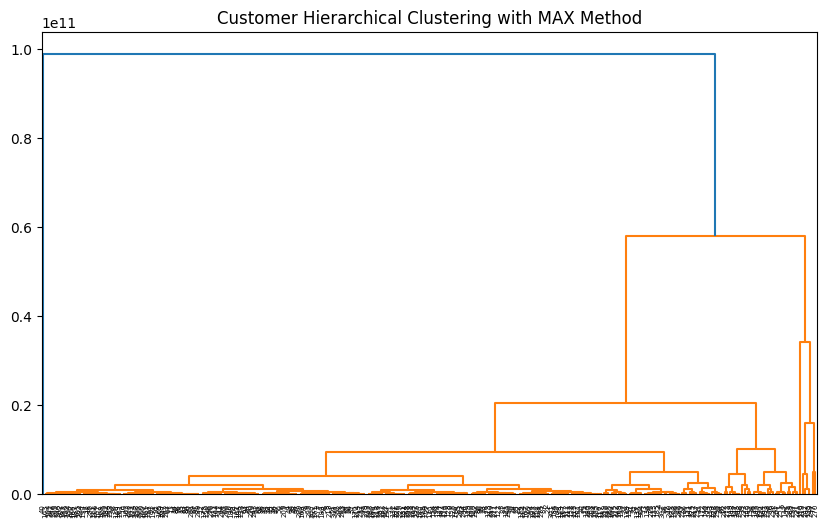

In [281]:
complete_linkage = linkage(data, method='complete')

plt.figure(figsize=(10, 6))
dendrogram(complete_linkage)
plt.title('Customer Hierarchical Clustering with MAX Method')
plt.show()

average linkage

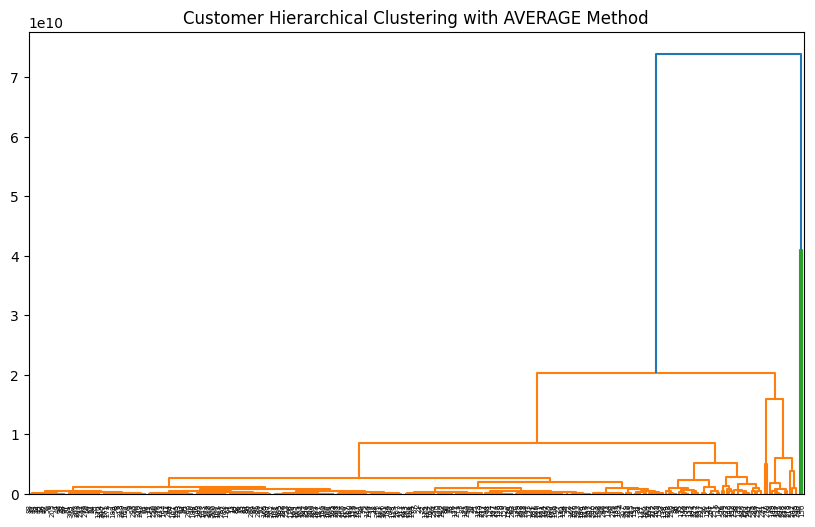

In [282]:
average_linkage = linkage(data, method='average')

plt.figure(figsize=(10, 6))
dendrogram(average_linkage)
plt.title('Customer Hierarchical Clustering with AVERAGE Method')
plt.show()

ward method

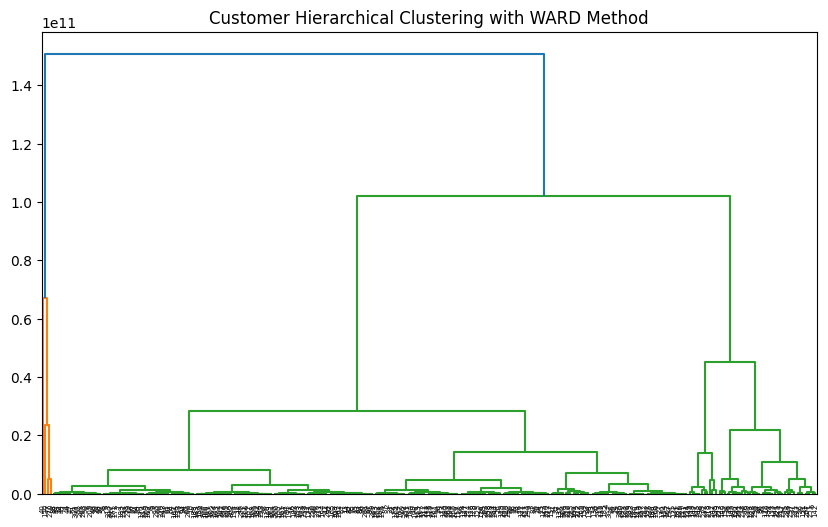

In [283]:
ward_method = linkage(data, method='ward')

plt.figure(figsize=(10, 6))
dendrogram(ward_method)
plt.title('Customer Hierarchical Clustering with WARD Method')
plt.show()